# Homework 4


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

%matplotlib inline

In [ ]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

lb = LabelBinarizer()
trainYnn = lb.fit_transform(trainY)
testYnn = lb.transform(testY)

11490434/11490434 [==============================] - 0s 0us/step


0.9256


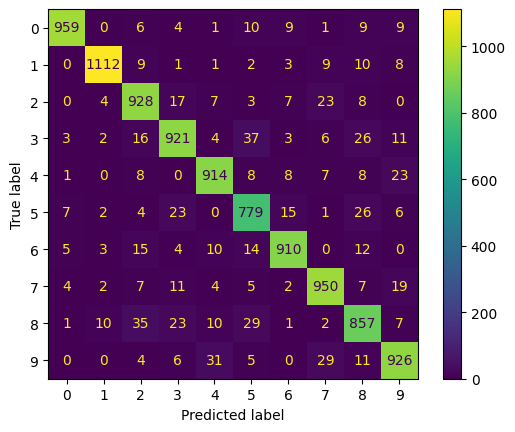

In [ ]:
lr = LogisticRegression()
pipe = Pipeline([("model", lr)])

pipe.fit(trainX,
          trainY)

y_pred_train = pipe.predict(trainX)
y_pred_test = pipe.predict(testX)

y_pred_train_prob = pipe.predict_proba(trainX)[:,1]
y_pred_test_prob = pipe.predict_proba(testX)[:,1]

print(accuracy_score(pipe.predict(testX), testY))
ConfusionMatrixDisplay.from_predictions(pipe.predict(testX), testY)

0.9346166666666667


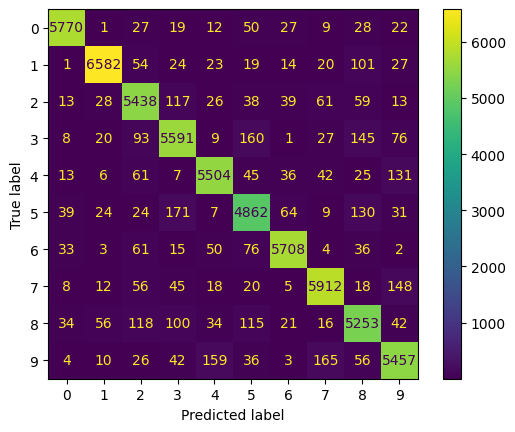

In [ ]:
print(accuracy_score(pipe.predict(trainX), trainY))
ConfusionMatrixDisplay.from_predictions(pipe.predict(trainX), trainY)

In [ ]:
model = kb.Sequential([
    kb.layers.Input(shape = [784]),
    kb.layers.Dense(128, input_shape=[784]),
    kb.layers.Dense(64, input_shape=[128]),
    kb.layers.Dense(32, input_shape=[64]),
    kb.layers.Dense(16, input_shape=[16]),
    kb.layers.Dense(8, input_shape=[8]),
    kb.layers.Dense(10, activation = "softmax")
])

# compile model
model.compile(loss="categorical_crossentropy", # loss function
              optimizer=kb.optimizers.SGD(0.01), # the optimizer for the model, don't change
	            metrics=["accuracy"]) # asks the model to grab accuracy

#fit the model
history = model.fit(trainX, # input, all the pixels
          trainYnn, # output, the digit, 0-9
          epochs = 100, # how long to train the model
          validation_data=(testX, testYnn)) # test set X and y

# model.evaluate(trainX, trainYnn)
model.evaluate(testX, testYnn)

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5526 - accuracy: 0.8344 - val_loss: 0.3489 - val_accuracy: 0.8984
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3479 - accuracy: 0.9002 - val_loss: 0.3209 - val_accuracy: 0.9103
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3246 - accuracy: 0.9076 - val_loss: 0.3089 - val_accuracy: 0.9124
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3132 - accuracy: 0.9111 - val_loss: 0.3056 - val_accuracy: 0.9151
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3053 - accuracy: 0.9141 - val_loss: 0.2990 - val_accuracy: 0.9166
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3000 - accuracy: 0.9160 - val_loss: 0.2985 - val_accuracy: 0.9153
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2960 - accuracy: 0.9170 - val_loss: 0.2939 - val_ac

[0.28407368063926697, 0.921500027179718]

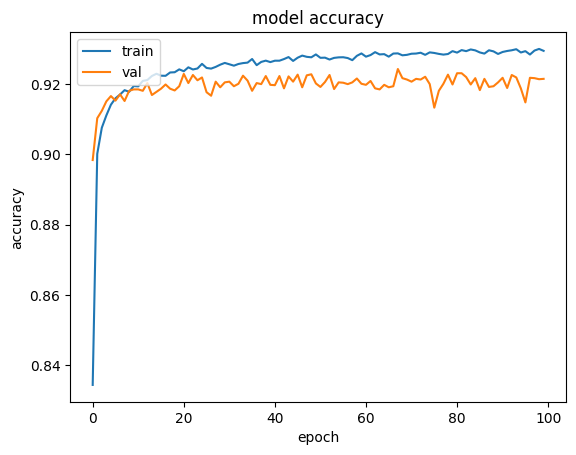

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

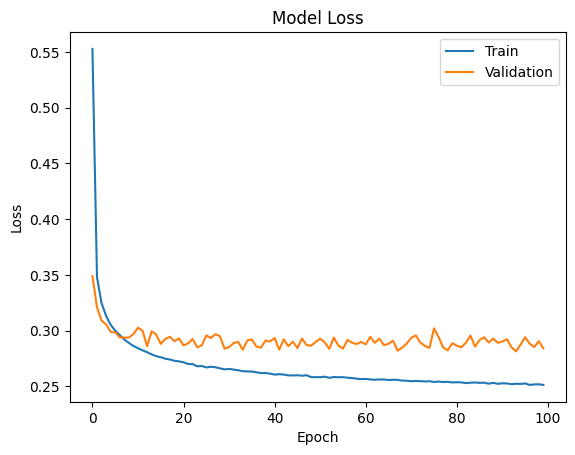

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

313/313 [==============================] - 1s 2ms/step
0.9215


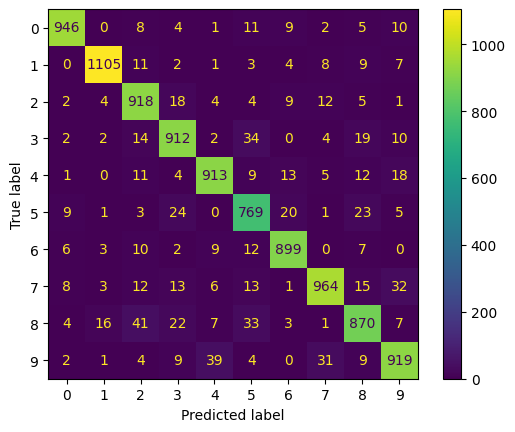

In [ ]:
y_pred = model.predict(testX)
y_pred_classes = y_pred.argmax(axis=1)

print(accuracy_score(y_pred_classes, testY))
ConfusionMatrixDisplay.from_predictions(y_pred_classes, testY)

1875/1875 [==============================] - 3s 2ms/step
0.93225


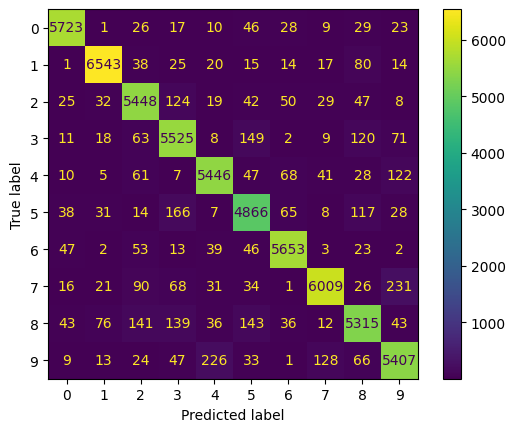

In [ ]:
y_pred_train = model.predict(trainX)
y_pred_train_classes = y_pred_train.argmax(axis=1)

print(accuracy_score(y_pred_train_classes, trainY))
ConfusionMatrixDisplay.from_predictions(y_pred_train_classes, trainY)